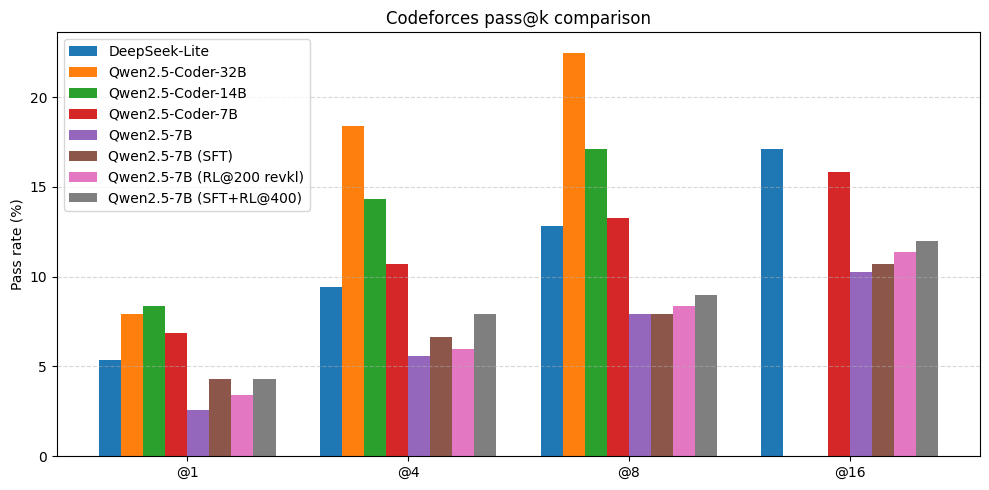

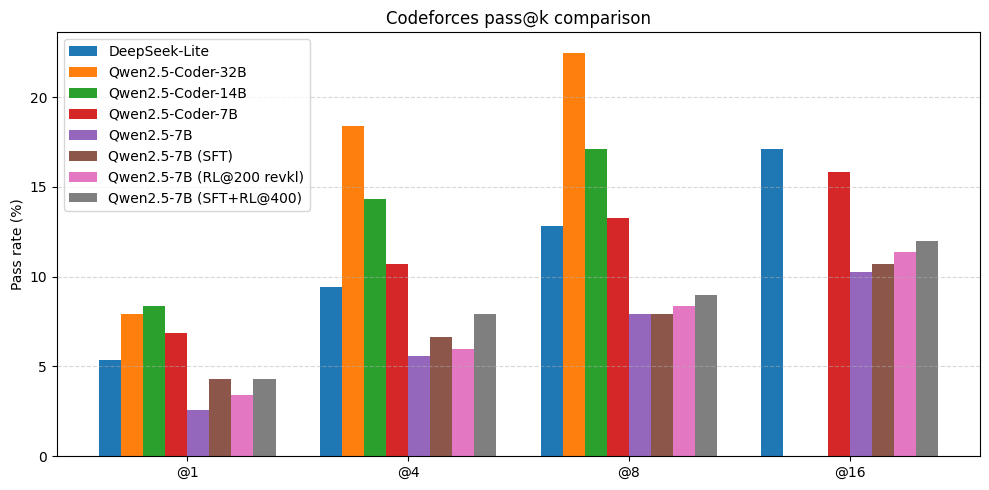

In [36]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_pass_rates(summary_files, labels=None, ks=(1, 4, 8, 16),
                    percentage=True, title="Codeforces pass@k comparison"):
    """
    Load multiple *_summary.json files and plot pass rates at selected k-values.

    Parameters
    ----------
    summary_files : list of str
        Paths to summary JSON files.  Each file must contain
        { "pass@k": { "1": int, "2": int, ..., "16": int }, "total": int }.
    labels : list of str, optional
        Human-friendly names for each summary.  If None, the base names of
        the files are used (with the trailing suffix removed).
    ks : tuple of int
        k values to visualise.  Missing k-values are replaced with NaN.
    percentage : bool
        If True, convert counts to percentages (100 * pass@k / total).
        If False, raw counts are plotted.
    title : str
        Plot title.

    Returns
    -------
    matplotlib.figure.Figure
        The figure containing the bar chart.

    Examples
    --------
    >>> files = [
    ...     "eval_jsons/DeepSeek-Coder-V2-Lite-Instruct_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
    ...     "data/results_imp/Qwen2.5-7B-Instruct_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json"
    ... ]
    >>> plot_pass_rates(files, labels=["DeepSeek (test)", "Qwen2.5-7B (test)"])
    """
    if labels is None:
        labels = [
            os.path.basename(f).replace("_results_with_reasoning_summary.json", "")
                               .replace("_summary.json", "")
            for f in summary_files
        ]
    # Collect rates per file
    series = []
    for f in summary_files:
        with open(f, "r", encoding="utf-8") as fh:
            data = json.load(fh)
        total = data.get("total", 1)
        counts = data.get("pass@k", {})
        values = []
        for k in ks:
            count = counts.get(str(k))
            if count is None:
                # If a particular k is missing (e.g. pass@16 not reported),
                # use NaN so it appears as a gap in the plot
                values.append(np.nan)
            else:
                values.append(100 * count / total if percentage else count)
        series.append(values)

    # Create grouped bar chart
    ks_labels = [f"@{k}" for k in ks]
    x = np.arange(len(ks))
    width = 0.8 / len(summary_files)  # total width fixed at 80%

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, model_values in enumerate(series):
        offset = (i - (len(series)-1)/2) * width
        ax.bar(x + offset, model_values, width=width, label=labels[i])

    ax.set_xticks(x)
    ax.set_xticklabels(ks_labels)
    ax.set_ylabel("Pass rate (%)" if percentage else "Pass count")
    ax.set_title(title)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    return fig

# Example usage:
plot_pass_rates(
     [
         "eval_jsons/DeepSeek-Coder-V2-Lite-Instruct_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
         "eval_jsons/Qwen2.5-Coder-32B-Instruct_codeforces_test_cpp_atk8_sidx_0_n1000_results_with_reasoning_summary.json",
         "eval_jsons/Qwen2.5-Coder-14B-Instruct_codeforces_test_cpp_atk8_sidx_0_n1000_results_with_reasoning_summary.json",
         "eval_jsons/Qwen2.5-Coder-7B-Instruct_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
         "data/results_imp/Qwen2.5-7B-Instruct_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
         "eval_jsons/Qwen2.5-7B-Instruct_epoch_4_step_1000_ft_codeforces_cot_filtered_truncated_with_reasoning_summary.json",
         "eval_jsons/sphinxnautics-7b_epoch_sphinxnautics-codeforces-cot-v3_step_0_ft_haj1r_RL_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
         "eval_jsons/sphinxnautics-7b_epoch_0_step_400_ft_haj1r_RLrev_codeforces_test_cpp_atk16_sidx_0_n1000_results_with_reasoning_summary.json",
     ],
     labels=["DeepSeek-Lite","Qwen2.5-Coder-32B","Qwen2.5-Coder-14B","Qwen2.5-Coder-7B", "Qwen2.5-7B","Qwen2.5-7B (SFT)","Qwen2.5-7B (RL@200 revkl)","Qwen2.5-7B (SFT+RL@400)"]
 )
